In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import regex as re
import nltk
nltk.download('stopwords')

import matplotlib.pyplot as plt

from numpy import array
from tensorflow import keras
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
from keras.layers import Input
from keras.layers import Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Upload the Dataset**

In [ ]:
from google.colab import files
data = files.upload()

Saving Modeltes-v3.csv to Modeltes-v3.csv


In [ ]:
csv_file_path = 'Modeltes-v3.csv'

dataframe = pd.read_csv(csv_file_path)

In [ ]:
print(dataframe.shape)

dataframe.head()

(372, 26)


,ID,Proyek,Skill,Budget,Durasi ( hari),Deskripsi,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,Next Project Pembuatan Aplikasi Android untuk ...,Android,"Rp 500,000 - 1,000,000",3,Berikut list pengerjaannya : 1. Menampilkan no...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,LAPORAN LKPM,Content Writer,"Rp 1,000,000 - 3,000,000",14,Dibutuhkan seseorang yang dapat saya beri kuas...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Pembuatan Aplikasi Taking Order Dari Aplikasi ...,Android,"Rp 2,000,000 - 7,000,000",7,Buat aplikasi taking order yang memunculkan st...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tiktok Content Creator untuk Brand Tas Cwe,Social Media,"Rp 500,000 - 1,500,000",7,Dicari Konten Creator untuk brand tas cwe sya...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Membuat Artikel di Media Online,Content Writer,"Rp 350,000 - 1,500,000",7,Pekerjaan Membuat artikel di salah satu media...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
del dataframe['Unnamed: 6']
del dataframe['Unnamed: 7']
del dataframe['Unnamed: 8']
del dataframe['Unnamed: 9']
del dataframe['Unnamed: 10']
del dataframe['Unnamed: 11']
del dataframe['Unnamed: 12']
del dataframe['Unnamed: 13']
del dataframe['Unnamed: 14']
del dataframe['Unnamed: 15']
del dataframe['Unnamed: 16']
del dataframe['Unnamed: 17']
del dataframe['Unnamed: 18']
del dataframe['Unnamed: 19']
del dataframe['Unnamed: 20']
del dataframe['Unnamed: 21']
del dataframe['Unnamed: 22']
del dataframe['Unnamed: 23']
del dataframe['Unnamed: 24']
del dataframe['Unnamed: 25']

dataframe.head()

,ID,Proyek,Skill,Budget,Durasi ( hari),Deskripsi
0,1,Next Project Pembuatan Aplikasi Android untuk ...,Android,"Rp 500,000 - 1,000,000",3,Berikut list pengerjaannya : 1. Menampilkan no...
1,2,LAPORAN LKPM,Content Writer,"Rp 1,000,000 - 3,000,000",14,Dibutuhkan seseorang yang dapat saya beri kuas...
2,3,Pembuatan Aplikasi Taking Order Dari Aplikasi ...,Android,"Rp 2,000,000 - 7,000,000",7,Buat aplikasi taking order yang memunculkan st...
3,4,Tiktok Content Creator untuk Brand Tas Cwe,Social Media,"Rp 500,000 - 1,500,000",7,Dicari Konten Creator untuk brand tas cwe sya...
4,5,Membuat Artikel di Media Online,Content Writer,"Rp 350,000 - 1,500,000",7,Pekerjaan Membuat artikel di salah satu media...


In [ ]:
print(dataframe["Proyek"][20])

Pembuatan Rest Api dengan Node JS


In [ ]:
skills = list(dataframe["Skill"].unique())
print(skills)
print(len(skills))

['Android', 'Content Writer', 'Social Media', 'UI/UX Design', 'Search Engine Optimization (SEO)', 'Electronic', 'Web Programming', 'Wordpress', 'Flutter', 'Business Analysis', 'Advertising', '3D Modelling', 'SPSS', 'Data Analysis', 'Microsoft Excel', 'Photography', 'Graphic Design', 'Architecture Tutorial/Assistant 3D Rendering', 'Financial Planning', 'Unity', 'Web Programming ', 'Internet Marketing ', 'Video Editing ', 'Data Analysis ', 'Accounting ', 'Internet Marketing', 'Social Media Marketing (SMM)', 'Oracle', 'Machine Learning', '3D Animation ', 'Python', 'App Innovation', 'Game Programming ', 'Adobe PhotoShop', 'Database', 'Adobe Illustrator', 'Data Entry', 'Virtual Box', '3D Architecture', 'Translation', 'Microsoft Excel ', 'Google Cloud Developer ', 'AutoCAD GIS ', 'Video Editing', 'Statistical Analysis', 'Personal Assistant', 'Administrative Support', 'Google Adsense', 'Business Consultation', 'Google Cloud Developer', 'Writing', 'Microsoft Word', 'Mobile Programming', 'Accou

<Axes: >

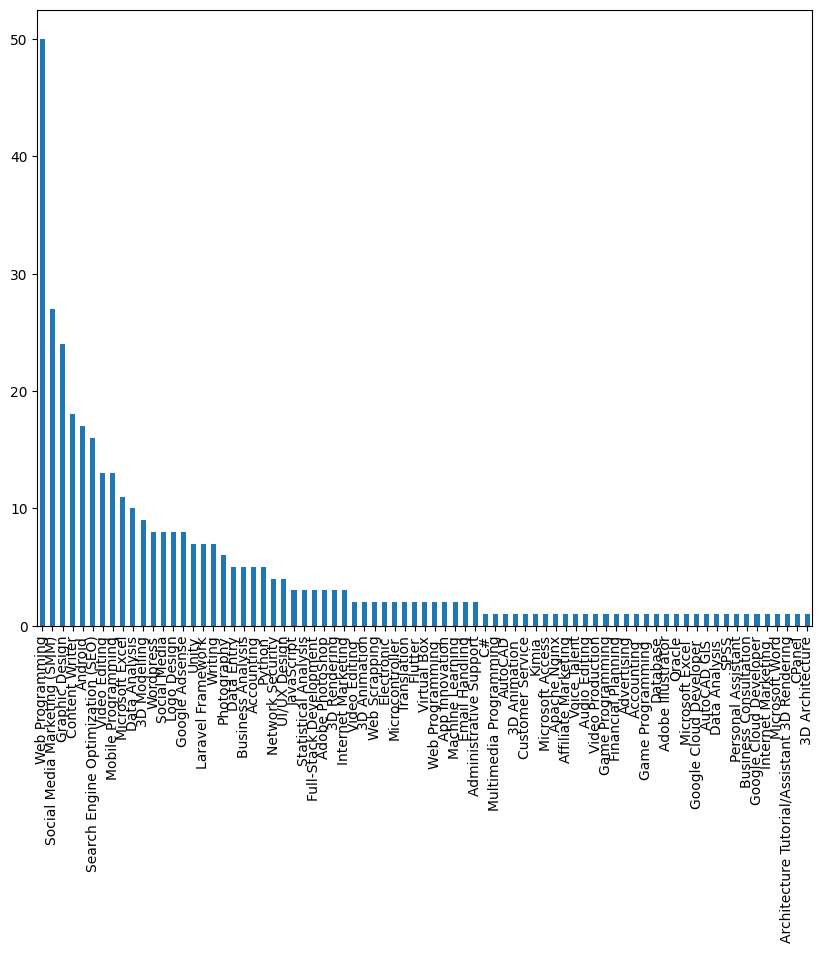

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

dataframe.Skill.value_counts().plot(kind='bar')

In [ ]:
stops = stopwords.words('indonesian')
stops.extend(['list', 'proyek', 'dibutuhkan', 'dicari', 'pekerjaan'])
print(stops)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
dataframe['text_data'] = dataframe['Proyek'] + ' ' + dataframe['Deskripsi']
dataframe.head()

,ID,Proyek,Skill,Budget,Durasi ( hari),Deskripsi,text_data
0,1,Next Project Pembuatan Aplikasi Android untuk ...,Android,"Rp 500,000 - 1,000,000",3,Berikut list pengerjaannya : 1. Menampilkan no...,Next Project Pembuatan Aplikasi Android untuk ...
1,2,LAPORAN LKPM,Content Writer,"Rp 1,000,000 - 3,000,000",14,Dibutuhkan seseorang yang dapat saya beri kuas...,LAPORAN LKPM Dibutuhkan seseorang yang dapat s...
2,3,Pembuatan Aplikasi Taking Order Dari Aplikasi ...,Android,"Rp 2,000,000 - 7,000,000",7,Buat aplikasi taking order yang memunculkan st...,Pembuatan Aplikasi Taking Order Dari Aplikasi ...
3,4,Tiktok Content Creator untuk Brand Tas Cwe,Social Media,"Rp 500,000 - 1,500,000",7,Dicari Konten Creator untuk brand tas cwe sya...,Tiktok Content Creator untuk Brand Tas Cwe Dic...
4,5,Membuat Artikel di Media Online,Content Writer,"Rp 350,000 - 1,500,000",7,Pekerjaan Membuat artikel di salah satu media...,Membuat Artikel di Media Online Pekerjaan Mem...


In [ ]:
dataframe['text_data'] = dataframe['text_data'].apply(lambda x: x.lower())
dataframe.head()

#dataframe.dtypes

,ID,Proyek,Skill,Budget,Durasi ( hari),Deskripsi,text_data
0,1,Next Project Pembuatan Aplikasi Android untuk ...,Android,"Rp 500,000 - 1,000,000",3,Berikut list pengerjaannya : 1. Menampilkan no...,next project pembuatan aplikasi android untuk ...
1,2,LAPORAN LKPM,Content Writer,"Rp 1,000,000 - 3,000,000",14,Dibutuhkan seseorang yang dapat saya beri kuas...,laporan lkpm dibutuhkan seseorang yang dapat s...
2,3,Pembuatan Aplikasi Taking Order Dari Aplikasi ...,Android,"Rp 2,000,000 - 7,000,000",7,Buat aplikasi taking order yang memunculkan st...,pembuatan aplikasi taking order dari aplikasi ...
3,4,Tiktok Content Creator untuk Brand Tas Cwe,Social Media,"Rp 500,000 - 1,500,000",7,Dicari Konten Creator untuk brand tas cwe sya...,tiktok content creator untuk brand tas cwe dic...
4,5,Membuat Artikel di Media Online,Content Writer,"Rp 350,000 - 1,500,000",7,Pekerjaan Membuat artikel di salah satu media...,membuat artikel di media online pekerjaan mem...


In [ ]:
jobs = []

for j in dataframe['text_data']:
  word = [word for word in j.split() if not word in stops]
  words = " ".join(word)
  jobs.append(words)

dataframe['features'] = pd.Series()
jobs = pd.DataFrame(jobs)
dataframe['features'] = jobs
dataframe.head()

<ipython-input-14-65538fa30abf>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dataframe['features'] = pd.Series()


,ID,Proyek,Skill,Budget,Durasi ( hari),Deskripsi,text_data,features
0,1,Next Project Pembuatan Aplikasi Android untuk ...,Android,"Rp 500,000 - 1,000,000",3,Berikut list pengerjaannya : 1. Menampilkan no...,next project pembuatan aplikasi android untuk ...,next project pembuatan aplikasi android membac...
1,2,LAPORAN LKPM,Content Writer,"Rp 1,000,000 - 3,000,000",14,Dibutuhkan seseorang yang dapat saya beri kuas...,laporan lkpm dibutuhkan seseorang yang dapat s...,laporan lkpm kuasa unuk pelaporan lkpm. proble...
2,3,Pembuatan Aplikasi Taking Order Dari Aplikasi ...,Android,"Rp 2,000,000 - 7,000,000",7,Buat aplikasi taking order yang memunculkan st...,pembuatan aplikasi taking order dari aplikasi ...,pembuatan aplikasi taking order aplikasi isx d...
3,4,Tiktok Content Creator untuk Brand Tas Cwe,Social Media,"Rp 500,000 - 1,500,000",7,Dicari Konten Creator untuk brand tas cwe sya...,tiktok content creator untuk brand tas cwe dic...,tiktok content creator brand tas cwe konten cr...
4,5,Membuat Artikel di Media Online,Content Writer,"Rp 350,000 - 1,500,000",7,Pekerjaan Membuat artikel di salah satu media...,membuat artikel di media online pekerjaan mem...,artikel media online artikel salah media terna...


In [ ]:
to_dataset = dataframe.drop(columns = ['ID', 'Proyek', 'Budget', 'Durasi ( hari)', 'Deskripsi', 'text_data'])

In [ ]:
# split the data into train and test set
train, rest = train_test_split(to_dataset, test_size=0.2, random_state=42, shuffle=True)
val, test = train_test_split(rest, test_size=0.5, random_state=42, shuffle=True)

In [ ]:
def get_job(data):
  job = to_dataset['features'].values
  #job = [np.array_split[job, 1]]
  labels = to_dataset['Skill'].values
  #labels = [np.array_split[50, 1]]
  return job, labels

job, labels = get_job(train)

In [ ]:
job[0], labels[0]

('next project pembuatan aplikasi android membaca file pdf pengerjaannya : 1. menampilkan notifikasi proses download dokumen 2. memperbaiki tombol back press halaman 3. local storage kategori,subkategori daftar dokumen 4. perbaikan tampilan',
 'Android')

In [ ]:
tokenizer = Tokenizer(num_words = 10000, oov_token='<OOV>')
tokenizer.fit_on_texts(job)

In [ ]:
tokenizer.texts_to_sequences(job[1])

[[1],
 [198],
 [1],
 [1],
 [2219],
 [198],
 [661],
 [],
 [1],
 [1071],
 [1],
 [1],
 [],
 [1071],
 [310],
 [198],
 [972],
 [198],
 [],
 [310],
 [661],
 [310],
 [1071],
 [],
 [1],
 [398],
 [1],
 [198],
 [1],
 [1],
 [2219],
 [198],
 [661],
 [],
 [1],
 [1071],
 [1],
 [1],
 [],
 [],
 [1],
 [2219],
 [1],
 [385],
 [1],
 [398],
 [1],
 [],
 [972],
 [1],
 [1],
 [1070],
 [398],
 [2219],
 [],
 [385],
 [398],
 [2219],
 [1071],
 [198],
 [440],
 [1722],
 [198],
 [661],
 [],
 [1071],
 [398],
 [661],
 [524],
 [198],
 [1],
 [198],
 [],
 [385],
 [440],
 [2219],
 [1],
 [1071],
 [2219],
 [198],
 [972],
 [440],
 [],
 [1],
 [398],
 [2219],
 [440],
 [2816],
 [440],
 [661],
 [198],
 [661],
 [],
 [],
 [1],
 [1],
 [398],
 [661],
 [],
 [524],
 [440],
 [972],
 [1071],
 [310],
 [972],
 [440],
 [],
 [661],
 [398],
 [1],
 [1],
 [1722],
 [440],
 [198],
 [385],
 [1],
 [398],
 []]

In [ ]:
maxlen = 100

def get_sequences(tokenizer, jobs):
  sequences = tokenizer.texts_to_sequences(job)
  padded = pad_sequences(sequences, truncating='post', padding = 'post', maxlen=maxlen)
  return padded

In [ ]:
padded_train_seq = get_sequences(tokenizer, job)

In [ ]:
padded_train_seq[0]

array([ 752,    9,    8,    3,   72, 1275,   60,  335, 2182,    2,  235,
        447,  181,  624,  122,   17,  753,  448,  754,  993,  201,   10,
       2183, 1276,  755, 2184,  756,  122,   85,  515,  336,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [ ]:
classes = set(labels)
class_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])
train_labels = names_to_ids(labels)

In [ ]:
print(classes)

{'Content Writer', 'Translation', '3D Animation ', 'Flutter', 'Administrative Support', 'Google Cloud Developer ', 'Video Editing', 'C#', 'Graphic Design', 'Video Production', 'Oracle', 'Personal Assistant', 'Unity', 'AutoCAD', 'Web Programming', 'Data Analysis', 'Full-Stack Development', 'App Innovation', 'AutoCAD GIS ', 'Multimedia Programming', 'Machine Learning', '3D Modelling', 'Virtual Box', 'Microsoft Word', 'Data Entry', 'Mobile Programming', 'Audio Editing', 'Electronic', 'Web Programming ', 'Microsoft Access', 'Google Adsense', 'Microsoft Excel', 'Photography', 'Video Editing ', 'Android', 'Business Consultation', 'Architecture Tutorial/Assistant 3D Rendering', 'Accounting ', 'UI/UX Design', 'CPanel', 'SPSS', 'Microsoft Excel ', 'Apache Nginx', '3D Animation', 'Google Cloud Developer', 'Internet Marketing ', 'Microcontroller', 'Customer Service', 'Network Security', 'Email Handling', '3D Architecture', 'Python', 'Laravel Framework', 'Financial Planning', 'Game Programming', '

In [ ]:
class_to_index

{'Content Writer': 0,
 'Translation': 1,
 '3D Animation ': 2,
 'Flutter': 3,
 'Administrative Support': 4,
 'Google Cloud Developer ': 5,
 'Video Editing': 6,
 'C#': 7,
 'Graphic Design': 8,
 'Video Production': 9,
 'Oracle': 10,
 'Personal Assistant': 11,
 'Unity': 12,
 'AutoCAD': 13,
 'Web Programming': 14,
 'Data Analysis': 15,
 'Full-Stack Development': 16,
 'App Innovation': 17,
 'AutoCAD GIS ': 18,
 'Multimedia Programming': 19,
 'Machine Learning': 20,
 '3D Modelling': 21,
 'Virtual Box': 22,
 'Microsoft Word': 23,
 'Data Entry': 24,
 'Mobile Programming': 25,
 'Audio Editing': 26,
 'Electronic': 27,
 'Web Programming ': 28,
 'Microsoft Access': 29,
 'Google Adsense': 30,
 'Microsoft Excel': 31,
 'Photography': 32,
 'Video Editing ': 33,
 'Android': 34,
 'Business Consultation': 35,
 'Architecture Tutorial/Assistant 3D Rendering': 36,
 'Accounting ': 37,
 'UI/UX Design': 38,
 'CPanel': 39,
 'SPSS': 40,
 'Microsoft Excel ': 41,
 'Apache Nginx': 42,
 '3D Animation': 43,
 'Google C

In [ ]:
index_to_class

{0: 'Content Writer',
 1: 'Translation',
 2: '3D Animation ',
 3: 'Flutter',
 4: 'Administrative Support',
 5: 'Google Cloud Developer ',
 6: 'Video Editing',
 7: 'C#',
 8: 'Graphic Design',
 9: 'Video Production',
 10: 'Oracle',
 11: 'Personal Assistant',
 12: 'Unity',
 13: 'AutoCAD',
 14: 'Web Programming',
 15: 'Data Analysis',
 16: 'Full-Stack Development',
 17: 'App Innovation',
 18: 'AutoCAD GIS ',
 19: 'Multimedia Programming',
 20: 'Machine Learning',
 21: '3D Modelling',
 22: 'Virtual Box',
 23: 'Microsoft Word',
 24: 'Data Entry',
 25: 'Mobile Programming',
 26: 'Audio Editing',
 27: 'Electronic',
 28: 'Web Programming ',
 29: 'Microsoft Access',
 30: 'Google Adsense',
 31: 'Microsoft Excel',
 32: 'Photography',
 33: 'Video Editing ',
 34: 'Android',
 35: 'Business Consultation',
 36: 'Architecture Tutorial/Assistant 3D Rendering',
 37: 'Accounting ',
 38: 'UI/UX Design',
 39: 'CPanel',
 40: 'SPSS',
 41: 'Microsoft Excel ',
 42: 'Apache Nginx',
 43: '3D Animation',
 44: 'Goog

In [ ]:
train_labels[1]

0

In [ ]:
print(to_dataset.shape)
to_dataset.head()

(372, 2)


,Skill,features
0,Android,next project pembuatan aplikasi android membac...
1,Content Writer,laporan lkpm kuasa unuk pelaporan lkpm. proble...
2,Android,pembuatan aplikasi taking order aplikasi isx d...
3,Social Media,tiktok content creator brand tas cwe konten cr...
4,Content Writer,artikel media online artikel salah media terna...


In [ ]:
print(dataframe.shape)
dataframe.head()

(372, 8)


,ID,Proyek,Skill,Budget,Durasi ( hari),Deskripsi,text_data,features
0,1,Next Project Pembuatan Aplikasi Android untuk ...,Android,"Rp 500,000 - 1,000,000",3,Berikut list pengerjaannya : 1. Menampilkan no...,next project pembuatan aplikasi android untuk ...,next project pembuatan aplikasi android membac...
1,2,LAPORAN LKPM,Content Writer,"Rp 1,000,000 - 3,000,000",14,Dibutuhkan seseorang yang dapat saya beri kuas...,laporan lkpm dibutuhkan seseorang yang dapat s...,laporan lkpm kuasa unuk pelaporan lkpm. proble...
2,3,Pembuatan Aplikasi Taking Order Dari Aplikasi ...,Android,"Rp 2,000,000 - 7,000,000",7,Buat aplikasi taking order yang memunculkan st...,pembuatan aplikasi taking order dari aplikasi ...,pembuatan aplikasi taking order aplikasi isx d...
3,4,Tiktok Content Creator untuk Brand Tas Cwe,Social Media,"Rp 500,000 - 1,500,000",7,Dicari Konten Creator untuk brand tas cwe sya...,tiktok content creator untuk brand tas cwe dic...,tiktok content creator brand tas cwe konten cr...
4,5,Membuat Artikel di Media Online,Content Writer,"Rp 350,000 - 1,500,000",7,Pekerjaan Membuat artikel di salah satu media...,membuat artikel di media online pekerjaan mem...,artikel media online artikel salah media terna...


In [ ]:
print(train.shape)
train.head()

(297, 2)


,Skill,features
192,Python,modifikasi pembuatan gui simulator perhitungan...
75,Video Editing,operator live streaming butuh operator live st...
84,Web Programming,pembuatan website auto assessment buatkan webs...
360,3D Rendering,butuh bantuan pembuatan sistem virtual reality...
16,Wordpress,custome css theme wordpress theme wordpress ba...


In [ ]:
print(val.shape)
val.head()

(37, 2)


,Skill,features
314,Machine Learning,model lstm bahasa go model lstm bahasa go kebu...
231,Virtual Box,menginstall windows 10 vmware fusion mac butuh...
152,Microsoft Excel,pembuatan data sekoloah buatkan rencana kegiat...
305,Unity,butuh game unity membutuhkan game unitydetailn...
311,Laravel Framework,bot pembelian tiket bot pembelian tiket otomat...


In [ ]:
print(test.shape)
test.head()

(38, 2)


,Skill,features
57,Video Editing,develop video content creator 1 video promosi ...
46,Web Programming,update fitur aplikasi event berbasis website p...
233,Laravel Framework,rubah sistem wallet laravel node js template w...
327,Mobile Programming,apps mom meeting kriteria apps :1. tampilan lo...
114,Adobe PhotoShop,"designer pro bikin feed, post sosmed top up ga..."


In [ ]:
# Overfitting
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,18,input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(77, activation='softmax')
])

# Overfitting
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

In [ ]:
val_jobs, val_labels = get_job(val)
val_sequences = get_sequences(tokenizer, val_jobs)
val_labels = names_to_ids(val_labels)

In [ ]:
h = model.fit(
     padded_train_seq, train_labels,
     validation_data=(val_sequences, val_labels),
     epochs=100
)

Epoch 1/100
12/12 [==============================] - 1s 95ms/step - loss: 0.3231 - accuracy: 0.9032 - val_loss: 0.3148 - val_accuracy: 0.9059
Epoch 2/100
12/12 [==============================] - 1s 93ms/step - loss: 0.3144 - accuracy: 0.9086 - val_loss: 0.3113 - val_accuracy: 0.9140
Epoch 3/100
12/12 [==============================] - 1s 93ms/step - loss: 0.3160 - accuracy: 0.9005 - val_loss: 0.3084 - val_accuracy: 0.9113
Epoch 4/100
12/12 [==============================] - 2s 139ms/step - loss: 0.3150 - accuracy: 0.9032 - val_loss: 0.3047 - val_accuracy: 0.9086
Epoch 5/100
12/12 [==============================] - 1s 117ms/step - loss: 0.3641 - accuracy: 0.8898 - val_loss: 0.3633 - val_accuracy: 0.9032
Epoch 6/100
12/12 [==============================] - 1s 94ms/step - loss: 0.4140 - accuracy: 0.8763 - val_loss: 0.4275 - val_accuracy: 0.8844
Epoch 7/100
12/12 [==============================] - 1s 93ms/step - loss: 0.4294 - accuracy: 0.8844 - val_loss: 0.4036 - val_accuracy: 0.8790
Epoc

In [ ]:
test_job, test_labels = get_job(test)
test_sequences = get_sequences(tokenizer, test_job)
test_labels = names_to_ids(test_labels)
model.evaluate(test_sequences, test_labels)

12/12 [==============================] - 0s 16ms/step - loss: 0.2054 - accuracy: 0.9355


[0.2054193764925003, 0.9354838728904724]

In [ ]:
# save as .h5
model.save('breel.h5',save_format='h5')

In [ ]:
sentence = 'javascript'
sequence = tokenizer.texts_to_sequences([sentence])
paddedSequence = pad_sequences(sequence, truncating = 'post', padding='post', maxlen=maxlen)
p = model.predict(np.expand_dims(paddedSequence[0], axis=0))[0]
pred_class=index_to_class[np.argmax(p).astype('uint8')]
print('Sentence:', sentence)
print('Predicted job: ', pred_class)

1/1 [==============================] - 0s 43ms/step
Sentence: javascript
Predicted job:  Photography
